<a href="https://colab.research.google.com/github/jokercsi/TextMining/blob/main/%E5%95%8F%E9%A1%8C_%E3%83%86%E3%82%AD%E3%82%B9%E3%83%88%E3%83%9E%E3%82%A4%E3%83%8B%E3%83%B3%E3%82%B0%E5%8B%89%E5%BC%B7%E4%BC%9A_4%E5%9B%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テキストマイニング勉強会 4回




【勉強会の全体スケジュール】

第1回 前処理，文書分類
- 正規表現や形態素解析器を駆使して日本語や英語の簡単な前処理できるようになる．
- 前処理済みテキスト情報を単語や文章のベクトル化し，簡単な機械学習モデルの構築，学習，考察を行う．


第2回 Twitterデータを利用した感情分析

- TwitterAPIでデータを取得し，日本語ツイートの簡単な前処理を行う．
- ツイートから感性辞書の構築を行いネガポジ分析を行う．

第3回 テキストをベクトル化する技術を輪講形式で紹介(※形式は問わない)

技術: word2vec，Doc2Vec，(Seq2Seq)
- どんなモデルなのか簡単に説明してもらう．
 (フレームワーク等を利用し実装する)

第4回 事前学習済みモデル(BERT，Transformer)を利用した文書分類，(感情分析)

- BERT，(Transformer)の大枠を理解をし，文脈型分散表現と単語型分散表現の違いを把握する．
- BERTの入出力関係を理解することで任意のテキストで特徴抽出ができるようになる．
- 事前学習済みモデルを利用したモデル構築を行い，簡単な分析，考察を行う．

第5回 最終課題の報告会+お手伝い会

- 自分で設定した問題の発表を行う．
- 最終課題の未完成部分のお手伝いと質問



## テキストマイニング勉強会 4回の目標

- BERT，(Transformer)の大枠を理解をし，文脈型分散表現と単語型分散表現の違いを把握する．

- BERTの入出力関係を理解することで任意のテキストで特徴抽出ができるようになる．


- 事前学習済みモデルを利用したモデル構築を行い，簡単な分析，考察を行う．


※学習方法は扱わない


# BERT，(Transformer)について


本勉強会ではこのTransformerよりBERTの方が汎用性が高く使用頻度が高いと考えられるため，BERTについて解説します．

Transformerとは主に翻訳タスクにおいてSeq2seq(RNNベースEncoder-Decoderモデル)よりも早くて精度が高いモデルです．下の図はTransformerの概要図でエンコーダーデコーダモデルとなっています．，




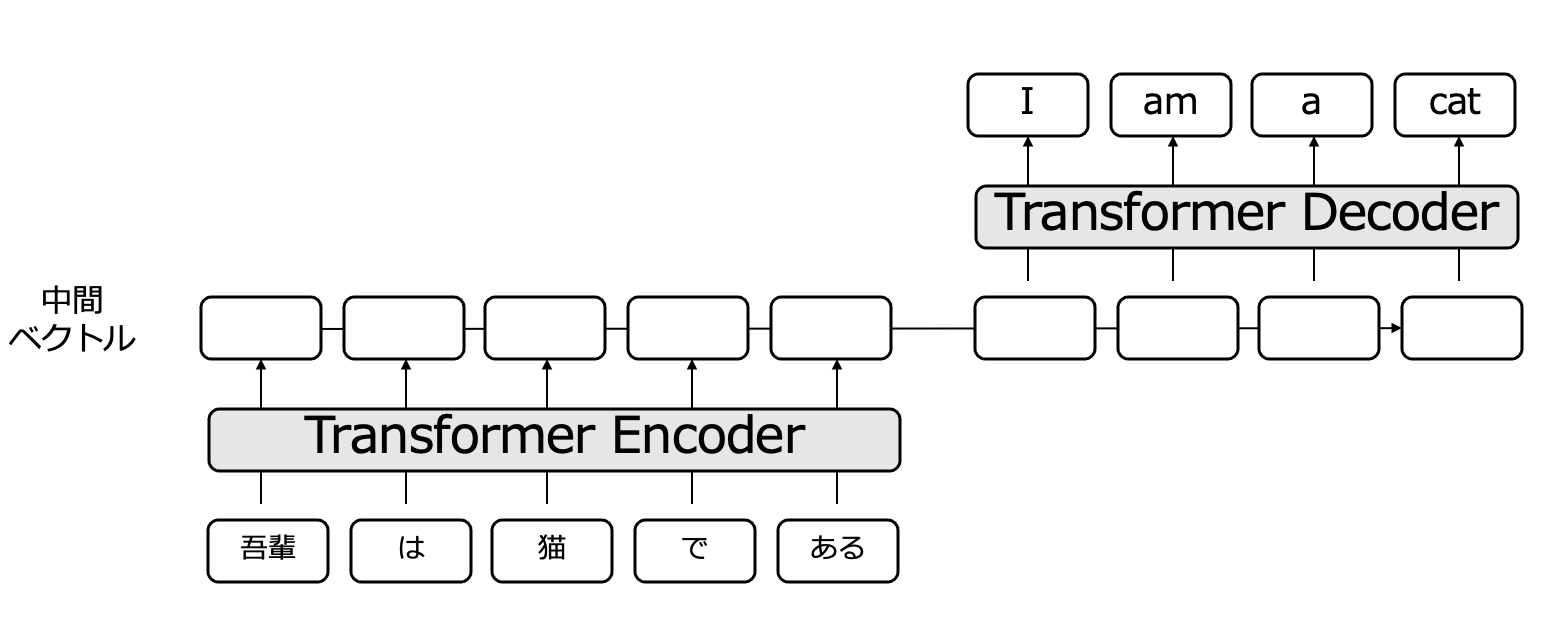


BERT(Bidirectional Encoder Representations from Transformers)はTransformerのEncoder部分のネットワークを利用しているモデルのことです．Transformer Encoderは入力した単語(トークン)の数，ベクトル化する手法です．

従来のRNNベースの手法ではそれぞれの層の中で文章の前方から順々に処理が行われており，後半になるについて前半の情報は失われるという問題点がありました．また，前方から順々に処理するため並列に計算することができず計算効率が高くないという欠点がありました．

BERTも文章をトークンに分割したものを入力として受け付けてそれぞれのトークンに対応するベクトルを出力する点でRNNを同じです．ただし，BERTはあるトークンの情報を処理する際に他のトークンの情報を参照して処理を行います．

この時，それぞれのトークンの情報を処理する際に，他のトークンの情報にどの程度注意(Attention)を払うかということは自動的に計算します．

このような方法をAttention(注意機構)と呼ばれ，Attentionを用いることでTransformerやBERTは離れた分散表現を得ることができ，性能向上すると言われています．

また，層内でそれぞれのトークンに対する出力は独立に計算することができるため，並列化による高い計算効率が期待されます．

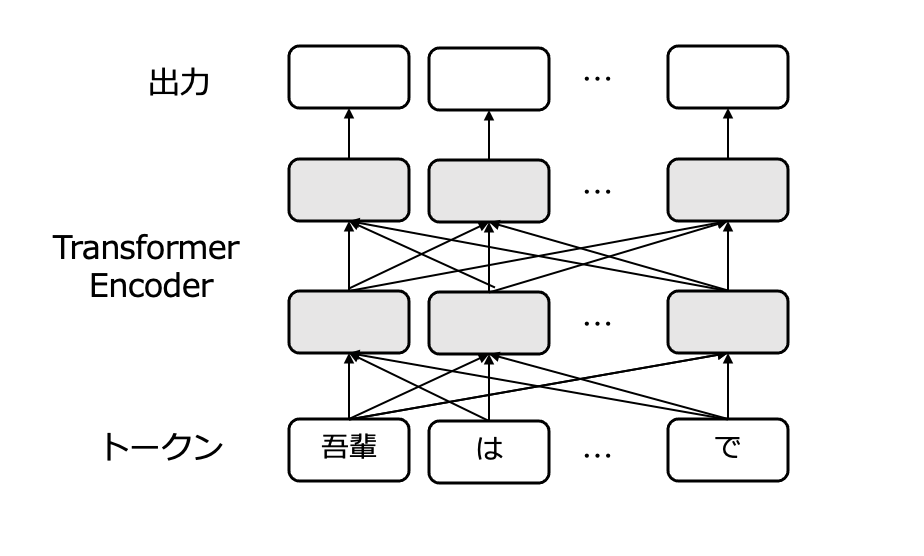




## BERTの入出力

BERTでは以下のようにして文章をトークン列に変換します．

単一の文章を入力するときには文章をトークン化したものに加えて，トークン列の先頭に特殊トークン[CLS]を，末尾に特殊トークン[SEP]を加えます．

```
今日の天気は雪だった．
```

という文章をBERTに入力するためには

```
'[CLS]', '今日', 'の', '天気', 'は', '雪', 'だっ', 'た', '.', '[SEP]'
```


というトークン列に変換します．

また，文章のペアを入力する時は一つ目のトークン列と二つ目のトークン列を並べその境界に[SEP]を置きBERTに入力します．


```
文章: 今日の天気は雪だった．
質問: 今日の天気は?
```


```
'[CLS]', '今日', 'の', '天気', 'は', '雪', 'だっ', 'た', '.', '[SEP]', '今日', 'の'，'天気'，'は', '?', '[SEP]'
```



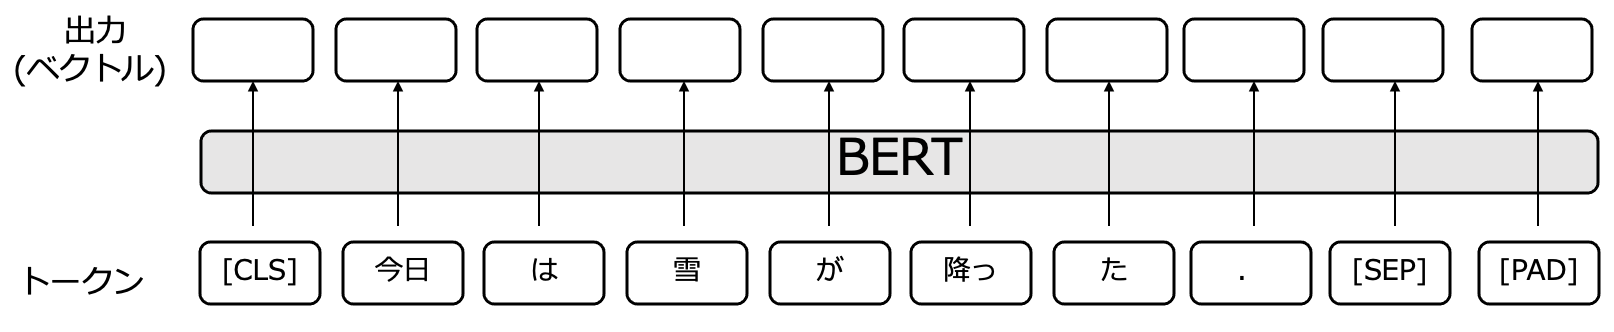

入力するトークン列の長さは固定長であることに注意してください．`[PAD]` は余白部分を埋めるための padding トークンです．

参考文献

- 深層学習界の大前提Transformerの論文解説！(https://qiita.com/omiita/items/07e69aef6c156d23c538)




## インストールとライブラリの読み込み

In [ ]:
!pip install transformers fugashi ipadic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 17.1 MB/s 
     |████████████████████████████████| 568 kB 61.0 MB/s 
     |████████████████████████████████| 13.4 MB 43.0 MB/s 
     |████████████████████████████████| 596 kB 57.3 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 6.6 MB 51.6 MB/s 
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556723 sha256=5e73cdeb51dd551be6e34b605d2de9ba8c0a5c70efa6fe750a7e70d27f554214
  Stored in directory: /root/.cache/pip/wheels/33/8b/99/cf0d27191876637cd3639a560f93aa982d7855ce826c94348b
Successfully built ipadic
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


TransformersはHuggingface社が提供しているオープンソースでありBERTをはじめとする様々なニューラルネットワークをはじめとした言語モデルが実装されています.TrasformerやBERTなど複雑なモデルは実装に手間がかかるため実装済みライブラリを利用されることもよくあります．


Huggingfaceのgithub

 https://github.com/huggingface/transformers

Huggingfaceの日本語学習済みモデル: BertJapanese

https://huggingface.co/docs/transformers/model_doc/bert-japanese

In [ ]:
import torch
from transformers import AutoTokenizer, BertModel
from transformers import AutoModel, AutoTokenizer

##  トークナイザ

トークナイザは文章をトークンに分割しBERTに入力できる形に変形するために使います．
トークンとは文章を分割した後の最小単位の単語のことです．

| ID  | トークン |     | 
| --- | -------- | --- | 
| 0   | [PAD]    |     | 
| 1   | [UNK]    |     | 
| 2   | [CLS]    |     | 
| 3   | [SEP]    |     | 
| 4   | [MASK]   |     | 
| 5   | の       |     | 
| 6   | ，       |     | 
| 7   | に       |     | 
| 8   | ．       |     | 
| 9   | は       |     | 
| ... | ...      |     | 
|     |          |     | 

学習済みトークナイザのダウンロードを行います．
本資料では東北大学の研究チームによって作成されたBERTの日本語の事前学習モデルを用います．このモデルはWikipediaの日本語記事のデータを用いて学習されています．

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese")

Downloading:   0%|          | 0.00/104 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252k [00:00<?, ?B/s]

この語彙は32000のトークンを含んでおり，tokenizer.vocabで確認できます．

In [ ]:
len(tokenizer.vocab)

32000

BERTの日本語モデルのトークナイザは以下の流れでトークン化を行います．

1. MeCabを用いて単語に分割する．
2. WordPieceを用いて単語をトークンに分割する．

WordPieceはMeCabで分割した文字列をトークンで分割します．

In [ ]:
string = '明日は進捗報告会だ．'
tokenizer.tokenize(string)

['明日', 'は', '進捗', '報告', '会', 'だ', '.']

文章をトークンのリストに分割できた．

In [ ]:
string = '明日はテキストマイニングについて勉強しよう．'
tokenizer.tokenize(string)

['明日', 'は', 'テキスト', 'マイ', '##ニング', 'について', '勉強', 'しよ', 'う', '.']

この例ではいくつかのトークンの先頭に##の記号付いてきます，##の記号はWordPieceによってサブワードに分割されたときに単語の一番最初のトークンに付与されます．



In [ ]:
string = '機械学習を中国語にすると机器学习だ．'
tokenizer.tokenize(string)

['機械', '学習', 'を', '中国', '語', 'に', 'する', 'と', '机', '器', '学', '[UNK]', 'だ', '.']

この例では出力に[UNK]というもとの文に含まれていないトークンが含まれていることがわかります．

実際にトークンをBERTに入力する際には，トークンではなくトークンのIDを入力します．文章を符号化するためには関数encodeを使い文章を入力するとID列をリストとして出力します．

In [ ]:
string = '明日は進捗報告会だ．'
ids = tokenizer.encode(string)
ids

[2, 11475, 9, 27578, 1888, 136, 75, 143, 3]

BERTに入力できるようにするためにトークン列の先頭に[CLS]，末尾[SEP]の特殊トークンをデフォルトで足すように実装されています．

In [ ]:
tokenizer.convert_ids_to_tokens(ids)

['[CLS]', '明日', 'は', '進捗', '報告', '会', 'だ', '.', '[SEP]']

Transormersのトークナイザを用いて文章をトークン化，もしくは符号化する方法はここまです．

## 学習済みモデルのダウンロード(BERT)

　符号化されたデータをBERTに入力しそれぞれのトークンに対する出力(ベクトル)を得る方法について説明します．



In [ ]:
bertjapanese = AutoModel.from_pretrained("cl-tohoku/bert-base-japanese")

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bertjapanese.config

BertConfig {
  "_name_or_path": "cl-tohoku/bert-base-japanese",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "tokenizer_class": "BertJapaneseTokenizer",
  "transformers_version": "4.19.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

このモデルのパラメータ数は1億1千万程度になっています．このモデルに符号化された文章を入力するとBERTの最終出力層の出力を得ることができます．

In [ ]:
text_list = [
    '明日は進捗報告会だ．',
    '明日はテキストマイニングについて勉強しよう．'
]
# 文章の符号化
encoding = tokenizer(
    text_list,
    max_length=32,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
encoding

{'input_ids': tensor([[    2, 11475,     9, 27578,  1888,   136,    75,   143,     3,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [    2, 11475,     9, 10306,  1728,  1581,   362,  8192,  2132,   205,
           143,     3,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
output = bertjapanese(**encoding)

In [ ]:
output

BaseModelOutputWithPoolingAndCrossAttentions([('last_hidden_state',
                                               tensor([[[ 0.5870,  0.2147, -0.1841,  ...,  0.1914,  0.4948, -0.5341],
                                                        [-0.3594, -0.0080,  0.3379,  ..., -0.4529,  0.0961, -0.3613],
                                                        [ 0.5854,  0.3386,  0.1451,  ..., -0.5430, -0.3047, -0.2310],
                                                        ...,
                                                        [ 0.0541, -0.0161,  0.0959,  ...,  0.0920,  0.2618, -0.5547],
                                                        [-0.3021, -0.1816, -0.0759,  ...,  0.2111,  0.2966, -0.1943],
                                                        [-0.0428,  0.4177, -0.4615,  ..., -0.0274, -0.0321,  0.0042]],
                                               
                                                       [[ 0.7999, -0.3966, -0.2144,  ..., -0.0410,  0.5129, -0.382

In [ ]:
output.last_hidden_state.size()

torch.Size([2, 32, 768])

last_hidden_stateは3次元の配列で(入力した文章数，系列長，隠れ状態の次元)です．上の場合だと入力した文章数は２，系列長は32，隠れ状態の次元数は768です．

## 文脈型分散表現の例

In [ ]:
text1 = "会社をクビになった。"
text2 = "テレワークばかりでクビが痛い。"
text3 = "会社を解雇された。"

In [ ]:
# 分かち書きをして、idに変換
input_ids1 = tokenizer.encode(text1, return_tensors='pt')  # ptはPyTorchの略

print(tokenizer.convert_ids_to_tokens(input_ids1[0].tolist()))  # 文章
print(input_ids1)  # id

['[CLS]', '会社', 'を', 'クビ', 'に', 'なっ', 'た', '。', '[SEP]']
tensor([[    2,   811,    11, 13700,     7,    58,    10,     8,     3]])


In [ ]:
# 分かち書きをして、idに変換
input_ids2 = tokenizer.encode(text2, return_tensors='pt')  # ptはPyTorchの略

print(tokenizer.convert_ids_to_tokens(input_ids2[0].tolist()))  # 文章
print(input_ids2)  # id

['[CLS]', 'テレ', '##ワーク', 'ばかり', 'で', 'クビ', 'が', '痛', '##い', '。', '[SEP]']
tensor([[    2,  5521,  3118,  4027,    12, 13700,    14,  4897, 28457,     8,
             3]])


In [ ]:
# 分かち書きをして、idに変換
input_ids3 = tokenizer.encode(text3, return_tensors='pt')  # ptはPyTorchの略

print(tokenizer.convert_ids_to_tokens(input_ids3[0].tolist()))  # 文章
print(input_ids3)  # id

['[CLS]', '会社', 'を', '解雇', 'さ', 'れ', 'た', '。', '[SEP]']
tensor([[   2,  811,   11, 7279,   26,   20,   10,    8,    3]])


In [ ]:
# 日本語BERTモデルに入力
#穴埋め
result1 = 

print(result1[0].shape)
print(result1[1].shape)

SyntaxError: ignored

In [ ]:
# 日本語BERTモデルに入力
#穴埋め
result2 = 
result3 = 

word_vec1 = result1[0][0][3][:]  # 1つ目の文章の”クビ”（3番目）
word_vec2 = result2[0][0][5][:]  # 2つ目の文章の”クビ”（5番目）
word_vec3 = result3[0][0][3][:]  # 3つ目の文章の”解雇”（3番目）

SyntaxError: ignored

In [ ]:
# コサイン類似度を求める
#穴埋め
cos = 
cos_sim_12 = cos(word_vec1, word_vec2)
cos_sim_13 = cos(word_vec1, word_vec3)

print(cos_sim_12)
print(cos_sim_13)

tensor(0.5537, grad_fn=<DivBackward0>)
tensor(0.7526, grad_fn=<DivBackward0>)


1つ目の文章のクビと2つ目の文章のクビは同じ単語であるが，それぞれ別の意味を持つため，1つ目の文章のクビの意味と近しい解雇の方がコサイン類似度が高い結果となる．

# BERTによる文書分類

In [ ]:
def bert_infer(text_list):
    # 文章の符号化
    encoding = tokenizer(
        text_list,
        max_length=32,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    with torch.no_grad():
        output = bertjapanese(**encoding)
        last_hidden_state = output.last_hidden_state
    return last_hidden_state

## データセットlivedoorニュースコーパス

In [ ]:
# データをダウンロード
!wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz

--2022-06-10 05:20:38--  https://www.rondhuit.com/download/ldcc-20140209.tar.gz
Resolving www.rondhuit.com (www.rondhuit.com)... 59.106.19.174
Connecting to www.rondhuit.com (www.rondhuit.com)|59.106.19.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8855190 (8.4M) [application/x-gzip]
Saving to: ‘ldcc-20140209.tar.gz’

ldcc-20140209.tar.g 100%[===================>]   8.44M  1.67MB/s    in 7.6s    

2022-06-10 05:20:47 (1.11 MB/s) - ‘ldcc-20140209.tar.gz’ saved [8855190/8855190]



In [ ]:
# ファイルを解答
!tar -zxf ldcc-20140209.tar.gz

それぞれの記事のカテゴリーを0~8の数字で表れたラベルに変換し，それぞれの記事からその文章ベクトルを計算します．

In [ ]:
# カテゴリーのリスト
category_list = [
    'dokujo-tsushin',
    'it-life-hack',
    'kaden-channel',
    'livedoor-homme',
    'movie-enter',
    'peachy',
    'smax',
    'sports-watch',
    'topic-news'
]

# 各データの形式を整える
max_length = 256

## 文章ベクトルの取得

In [ ]:
import glob
import numpy as np

In [ ]:
# 文章ベクトルを追加していく
sentence_vectors = []
labels = []
# 取得する文章数
max_sentence = 100
n = max_sentence * len(category_list)
for label, category in enumerate(category_list):
    for i, file in enumerate(glob.glob(f'./text/{category}/{category}*')):
        # 記事から文章を抜き出し符号化
        lines = open(file).read().splitlines()
        text = '\n'.join(lines[3:])
        last_hidden_state = bert_infer(text)
        print(last_hidden_state)
        # 文章ベクトルを計算
        # 演習
        # BERTの最終層の出力を平均を計算する
        #averaged_hidden_state = 
        # 文章ベクトルとラベルの追加
        sentence_vectors.append(averaged_hidden_state.cpu().numpy())
        labels.append(label)
        if i+1 >= max_sentence:
            break
        print(f"\r{label}: {int((i/n)*100+1)}% [{'#'*int((i/n)*100)}]", end='')
    print()

NameError: ignored

In [ ]:
sentence_vectors = np.array(sentence_vectors)
labels = np.array(labels)

In [ ]:
len(sentence_vectors)

900

各カテゴリ100記事の文章についてベクトルの取得ができました．

##  文章コーパスの可視化

ここでは記事の文章ベクトルがどのように分布しているのかを可視化する問題を扱います．文章ベクトルは一般的には数百次元のベクトルです．そのため，文章ベクトルがどのように分布しているのか人間が理解するのは簡単ではありません．高次元のベクトルを理解するために低次元にマッピングする次元削減手法がよく使われます．

- 主成分分析
- t-SNE

などがあります．


簡単にまとめる主成分分析(PCA)はデータのばらつきが大きな方向を選びその方向にデータを線形に射影するような方法です．t-SNEは高次元の空間上で距離の近い点同士は低次元の空間でも距離が近くなるように，高次元の空間上で遠い点同士は低次元の空間でも遠くなるように学習する非線形手法です．t-SNEは主成分分析と比べるとデータの局所的，大域的な構造をうまく捉えることができると言われているため，よく利用されます．



## PCA

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

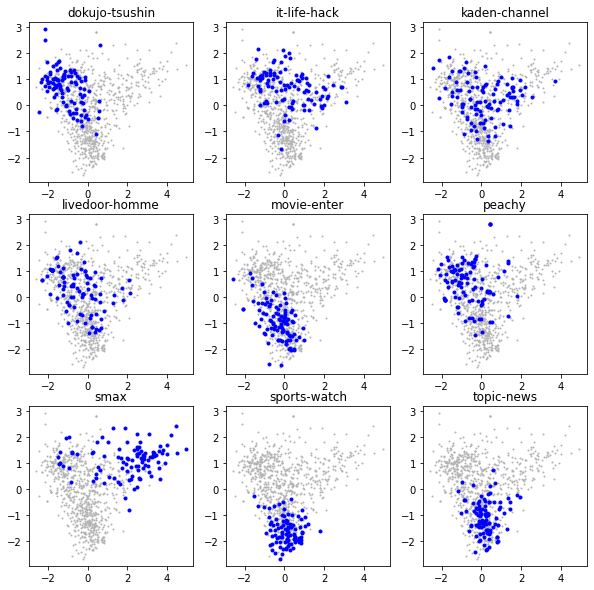

In [ ]:
sentence_vectors_pca = PCA(n_components=2).fit_transform(sentence_vectors)

plt.figure(figsize=(10, 10))
for label in range(9):
    plt.subplot(3, 3, label+1)
    index = labels == label
    plt.plot(sentence_vectors_pca[:, 0],
             sentence_vectors_pca[:, 1],
             'o',
             markersize=1,
             color=[0.7, 0.7, 0.7])

    plt.plot(sentence_vectors_pca[index, 0],
             sentence_vectors_pca[index, 1],
             'o',
             markersize=3,
             color='b')
    plt.title(category_list[label])


## t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


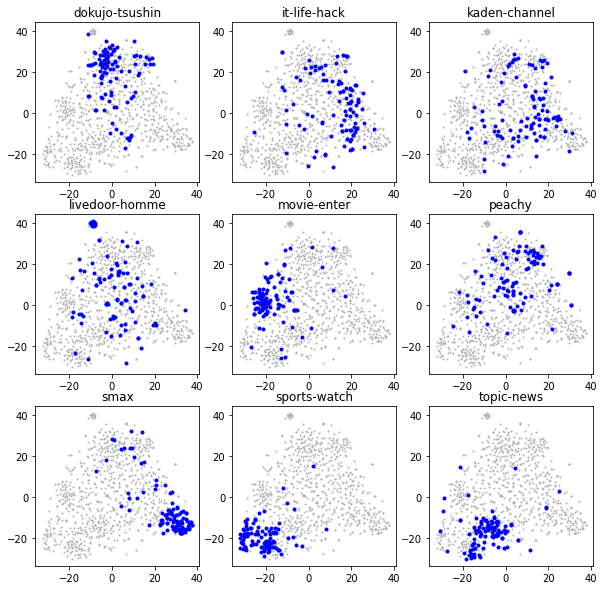

In [ ]:
sentence_vectors_pca = TSNE(n_components=2).fit_transform(sentence_vectors)

plt.figure(figsize=(10, 10))
for label in range(9):
    plt.subplot(3, 3, label+1)
    index = labels == label
    plt.plot(sentence_vectors_pca[:, 0],
             sentence_vectors_pca[:, 1],
             'o',
             markersize=1,
             color=[0.7, 0.7, 0.7])

    plt.plot(sentence_vectors_pca[index, 0],
             sentence_vectors_pca[index, 1],
             'o',
             markersize=3,
             color='b')
    plt.title(category_list[label])


## ロジスティック回帰による分類

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
sentence_vectors = np.array(sentence_vectors)
labels = np.array(labels)

#  80%のデータを学習データに、20%を検証データにする
x_train, x_test, y_train, y_test = train_test_split(sentence_vectors, labels, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((720, 768), (180, 768), (720,), (180,))

In [ ]:
model = LogisticRegression(max_iter=1000) # ロジスティック回帰モデルのインスタンスを作成

In [ ]:
model.fit(x_train, y_train) # ロジスティック回帰モデルの重みを学習

LogisticRegression(max_iter=1000)

評価データの先頭の事例に関して、分類クラスの条件付き確率
を求める。

In [ ]:
model.predict_proba(x_test[0:1,:])

array([[0.50317415, 0.0968698 , 0.07530118, 0.01174765, 0.04502309,
        0.03589634, 0.00054963, 0.02919933, 0.20223883]])

評価データ上での正解率を計測する。

In [ ]:
model.score(x_test, y_test)

0.6611111111111111

混同行列を得る。

In [ ]:
y_test_pred = model.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[13,  1,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  7,  2,  2,  1,  1,  0,  0,  0],
       [ 4,  6, 10,  0,  1,  1,  1,  1,  1],
       [ 2,  1,  1, 12,  2,  1,  0,  0,  1],
       [ 2,  0,  1,  0, 15,  0,  0,  0,  2],
       [ 3,  0,  0,  4,  3, 11,  0,  0,  0],
       [ 1,  3,  0,  1,  0,  0, 18,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  3],
       [ 0,  1,  0,  1,  1,  0,  0,  1, 16]])

各クラスごとの適合率、再現率、F1スコアを出力してください

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

適合率の計算

再現率の計算

array([0.72222222, 0.53846154, 0.4       , 0.6       , 0.75      ,
       0.52380952, 0.7826087 , 0.85      , 0.8       ])

F1スコアの計算

array([0.60465116, 0.4375    , 0.51282051, 0.6       , 0.69767442,
       0.56410256, 0.85714286, 0.87179487, 0.74418605])

# BERTによる感情分析

In [ ]:
from transformers import pipeline, AutoModelForSequenceClassification, BertJapaneseTokenizer

# パイプラインの準備
sentiment = AutoModelForSequenceClassification.from_pretrained('daigo/bert-base-japanese-sentiment') 

Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

In [ ]:
text_list = [
    '今日は進捗報告会だ．',
    '今日はテキストマイニングについて勉強しよう．',
    '嫌いではない！(;´Д`)',
    '明日は暑い',
]
# 文章の符号化
encoding = tokenizer(
    text_list,
    max_length=32,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)
with torch.no_grad():
    outputs = sentiment(**encoding)
outputs

SequenceClassifierOutput([('logits', tensor([[ 1.9341, -1.4313],
                                   [ 2.3199, -2.0896],
                                   [ 1.2690, -0.9996],
                                   [-0.4067,  1.1741]]))])

logitsという部分に出力結果が入っているようです。
このlogitsというのは、Headの出力値をそのまま反映しているものです。
分類結果として活用するためには、Softmaxを使ってこれを正規化し、確率に変換する必要があります。



In [ ]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[0.9666, 0.0334],
        [0.9880, 0.0120],
        [0.9062, 0.0938],
        [0.1707, 0.8293]])


In [ ]:
import numpy as np

label_dict = sentiment.config.id2label
predictions_list = predictions.cpu().detach().numpy()

for i in range(len(text_list)):
    print('入力テキスト：', text_list[i])
    print('分類結果：', label_dict[np.argmax(predictions_list[i])])
    print('確率：', np.max(predictions_list[i]))

入力テキスト： 明日は進捗報告会だ．
分類結果： ポジティブ
確率： 0.96660364
入力テキスト： 明日はテキストマイニングについて勉強しよう．
分類結果： ポジティブ
確率： 0.9879853
入力テキスト： 彼のことは嫌いではない！(;´Д`)
分類結果： ポジティブ
確率： 0.90624166
入力テキスト： 今日は暑い
分類結果： ネガティブ
確率： 0.8293252


hugging faceのpiplineを用いるともっとスッキリかけます．

In [ ]:
sentiment_pipline = pipeline("sentiment-analysis",model=sentiment, tokenizer=tokenizer)

In [ ]:
sentiment_pipline(text_list)

[{'label': 'ポジティブ', 'score': 0.9666036367416382},
 {'label': 'ポジティブ', 'score': 0.9879853129386902},
 {'label': 'ポジティブ', 'score': 0.906241774559021},
 {'label': 'ネガティブ', 'score': 0.8293250799179077}]

## chABSA-datasetのダウンロード

BERTによる感情分析としてTIS株式会社が公開している上場企業の有価証券報告書を用いて作成されたマルチラベルのネガポジ判定データセットchABSA-datasetを利用します．

https://github.com/chakki-works/chABSA-dataset

このデータセットには「ネガティブ」，「ポジティブ」，「ニュートラル」の3つカテゴリがそれぞれの文章に対してラベルづけされています．

まずデータをダウンロードしzipファイルを解凍します．

In [ ]:
!wget https://s3-ap-northeast-1.amazonaws.com/dev.tech-sketch.jp/chakki/public/chABSA-dataset.zip

--2022-06-05 06:45:15--  https://s3-ap-northeast-1.amazonaws.com/dev.tech-sketch.jp/chakki/public/chABSA-dataset.zip
Resolving s3-ap-northeast-1.amazonaws.com (s3-ap-northeast-1.amazonaws.com)... 52.219.4.64
Connecting to s3-ap-northeast-1.amazonaws.com (s3-ap-northeast-1.amazonaws.com)|52.219.4.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 722777 (706K) [application/zip]
Saving to: ‘chABSA-dataset.zip’

chABSA-dataset.zip  100%[===================>] 705.84K   941KB/s    in 0.8s    

2022-06-05 06:45:16 (941 KB/s) - ‘chABSA-dataset.zip’ saved [722777/722777]



In [ ]:
!unzip chABSA-dataset.zip

Archive:  chABSA-dataset.zip
   creating: chABSA-dataset/
  inflating: chABSA-dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/chABSA-dataset/
  inflating: __MACOSX/chABSA-dataset/._.DS_Store  
 extracting: chABSA-dataset/.gitkeep  
  inflating: chABSA-dataset/e00008_ann.json  
  inflating: chABSA-dataset/e00017_ann.json  
  inflating: chABSA-dataset/e00024_ann.json  
  inflating: chABSA-dataset/e00026_ann.json  
  inflating: chABSA-dataset/e00030_ann.json  
  inflating: chABSA-dataset/e00033_ann.json  
  inflating: chABSA-dataset/e00034_ann.json  
  inflating: chABSA-dataset/e00035_ann.json  
  inflating: chABSA-dataset/e00037_ann.json  
  inflating: chABSA-dataset/e00051_ann.json  
  inflating: chABSA-dataset/e00053_ann.json  
  inflating: chABSA-dataset/e00058_ann.json  
  inflating: chABSA-dataset/e00069_ann.json  
  inflating: chABSA-dataset/e00091_ann.json  
  inflating: chABSA-dataset/e00107_ann.json  
  inflating: chABSA-dataset/e00114_ann.json  
  inflating: ch

それぞれのファイルはe*****_ann.jsonという名前のjson形式です．(*はなんらかの数字を意味します)データファイルは230あり，それぞれが一つの企業の有価証券報告書のデータに対応しています．

chABSA-dataset/e00030_ann.jsonというファイルは以下のようになっています．

In [ ]:
import json 
import pandas as pd
data = json.load(open('chABSA-dataset/e00030_ann.json'))
data

{'header': {'category17': 'エネルギー資源',
  'category33': '石油・石炭製品',
  'doc_text': '有価証券報告書',
  'document_id': 'E00030',
  'document_name': '日本コークス工業株式会社',
  'edi_id': 'E00030',
  'scale': '7',
  'security_code': '33150'},
 'sentences': [{'opinions': [{'category': 'NULL#general',
     'from': 6,
     'polarity': 'neutral',
     'target': 'わが国経済',
     'to': 11},
    {'category': 'NULL#general',
     'from': 13,
     'polarity': 'positive',
     'target': '景気',
     'to': 15},
    {'category': 'NULL#general',
     'from': 28,
     'polarity': 'positive',
     'target': '設備投資',
     'to': 32},
    {'category': 'NULL#general',
     'from': 42,
     'polarity': 'positive',
     'target': '企業収益',
     'to': 46},
    {'category': 'NULL#general',
     'from': 62,
     'polarity': 'neutral',
     'target': '資源国等',
     'to': 66},
    {'category': 'NULL#general',
     'from': 80,
     'polarity': 'negative',
     'target': '為替',
     'to': 82}],
   'sentence': '当期におけるわが国経済は、景気は緩やかな回復基調が続き、設備投資の持ち直し等

dataset['sentence']はリストで与えられ，各要素が単一のデータに対応します．それぞれのデータは辞書形式で与えられ，`sentence`の項目はネガポジ判定を行う文章，`options`の項目はラベル付けの結果を表し，`polarity`の項目はネガポジ判定が対象となる表現が「ネガティブ」，「ポジティブ」，「ニュートラル」かを表しています．

データの整形を行う

In [ ]:
category_id = {'negative': 0, 'neutral': 1, 'positive': 2}
dataset = []
for file in glob.glob('chABSA-dataset/*.json'):
    data = json.load(open(file))
    # 各データから文章(text)を抜き出し，ラベル('labe')を作成
    for sentence in data['sentences']:
        text = sentence['sentence']
        labels = np.array([0, 0, 0])
        for opinion in sentence['opinions']:
            labels[category_id[opinion['polarity']]] = 1
        
        # ラベルがポジティブ[0, 0, 1]
        if (labels == np.array([0, 0, 1])).all():
            sentiment = 1
            sample = {'text': text, 'sentiment': sentiment}
            dataset.append(sample)

        #ラベルが ネガティブ[1, 0, 0]の時
        if (labels == np.array([1, 0, 0])).all():
            sentiment = 0
            sample = {'text': text, 'sentiment': sentiment}
            dataset.append(sample)
df_sentiment = pd.DataFrame(data=dataset)
df_sentiment.head()

,text,sentiment
0,当期における世界経済は、中国経済に対する懸念の高まり、英国のEU離脱問題などによる不安定な情...,1
1,米州においては、売上が減少するなかではあるものの、生産ロス改善や合理化等を進め、体質改善を図...,0
2,利益面では、積極的な原価低減を展開いたしましたが、為替を中心とする減収影響に加え、新機種モデ...,0
3,親会社の所有者に帰属する当期利益は196億22百万円と前連結会計年度に比べ39億５百万円（1...,0
4,厳しい競合環境が続く米州市場での競争力を更に強化するため、生産性の向上を目的として新型一括溶...,0


データ数が多いため最初の100件のみ利用する

In [ ]:
df_sentiment = df_sentiment.head(100)

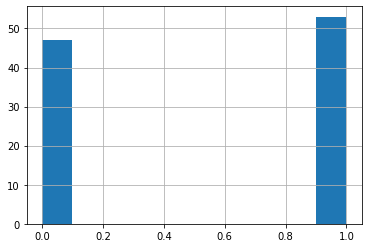

In [ ]:
df_sentiment['sentiment'].hist()

若干ポジティブクラスに属するテキストが多いのですが，ほとんどクラス均衡していることを確認します．

## Hugginface sentimentで予測

In [ ]:
sentiment_dic = {'ポジティブ': 1, 'ネガティブ': 0}
n = len(df_sentiment['text'])
for i, text in enumerate(df_sentiment['text'].values):
    output = sentiment_pipline(text)
    pred_label = sentiment_dic[output[0]['label']]
    if pred_label == 1:
        positive_score = output[0]['score']
    else:
        # ネガティブに関するスコアは反転
        positive_score = 1 - output[0]['score']
    df_sentiment.loc[i, 'pred_label'] = pred_label
    df_sentiment.loc[i, 'pred_score'] = positive_score
    print(f"\r{int((i/n)*100+1)}% [{'#'*int((i/n)*100)}]", end='')

100% [###################################################################################################]

In [ ]:
df_sentiment['pred_label'] = df_sentiment['pred_label'].astype(np.int8)
df_sentiment['pred_score'] = df_sentiment['pred_score'].astype(np.float32)
df_sentiment.head()

,text,sentiment,pred_label,pred_score
0,当期における世界経済は、中国経済に対する懸念の高まり、英国のEU離脱問題などによる不安定な情...,1,1,0.735635
1,米州においては、売上が減少するなかではあるものの、生産ロス改善や合理化等を進め、体質改善を図...,0,1,0.893505
2,利益面では、積極的な原価低減を展開いたしましたが、為替を中心とする減収影響に加え、新機種モデ...,0,0,0.484795
3,親会社の所有者に帰属する当期利益は196億22百万円と前連結会計年度に比べ39億５百万円（1...,0,0,0.372127
4,厳しい競合環境が続く米州市場での競争力を更に強化するため、生産性の向上を目的として新型一括溶...,0,1,0.876869


まず正答率を計算する

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
y_true = df_sentiment['sentiment'].values
y_pred = df_sentiment['pred_label'].values
accuracy_score(y_true, y_pred)

0.71

次にROC曲線を描いてみる

In [ ]:
pred_score = df_sentiment['pred_score'].values
fpr, tpr, thres = roc_curve(y_true, pred_score)

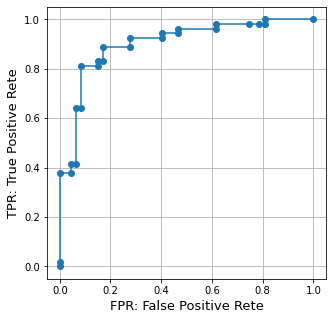

In [ ]:
plt.figure(figsize = (5, 5)) #単一グラフの場合のサイズ比の与え方
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False Positive Rete', fontsize = 13)
plt.ylabel('TPR: True Positive Rete', fontsize = 13)
plt.grid()
plt.show()

In [ ]:
auc_score = auc(fpr, tpr)
print('auc_socre:', auc_score)

auc_socre: 0.9032517061421116


AUCの数値が高く正答率が低い結果になった．

##  閾値の再設定

ポジティブなテキストには予測値を大きくネガティブなテキストには予測値を小さく推定ができているため，閾値を適切に設定できればより正答率を高めることができると考えられる．

参考サイト

https://qiita.com/TsutomuNakamura/items/ef963381e5d2768791d4#%E7%8F%BE%E5%AE%9F%E7%9A%84%E3%81%AAroc-%E6%9B%B2%E7%B7%9Aauc-%E3%82%92%E5%8F%82%E8%80%83%E3%81%AB%E9%96%BE%E5%80%A4%E3%82%92%E8%AA%BF%E6%95%B4%E3%81%99%E3%82%8B

In [ ]:
tpr

array([0.        , 0.01886792, 0.37735849, 0.37735849, 0.41509434,
       0.41509434, 0.64150943, 0.64150943, 0.81132075, 0.81132075,
       0.83018868, 0.83018868, 0.88679245, 0.88679245, 0.9245283 ,
       0.9245283 , 0.94339623, 0.94339623, 0.96226415, 0.96226415,
       0.98113208, 0.98113208, 0.98113208, 0.98113208, 1.        ,
       1.        ])

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.04255319, 0.04255319,
       0.06382979, 0.06382979, 0.08510638, 0.08510638, 0.14893617,
       0.14893617, 0.17021277, 0.17021277, 0.27659574, 0.27659574,
       0.40425532, 0.40425532, 0.46808511, 0.46808511, 0.61702128,
       0.61702128, 0.74468085, 0.78723404, 0.80851064, 0.80851064,
       1.        ])

In [ ]:
thres

array([1.9526532 , 0.9526532 , 0.8957274 , 0.890332  , 0.88367385,
       0.87686914, 0.82531905, 0.82479465, 0.7834007 , 0.76816475,
       0.7528427 , 0.7415004 , 0.7356345 , 0.7057538 , 0.7024291 ,
       0.64099795, 0.62787795, 0.5747572 , 0.57457626, 0.48479462,
       0.46204722, 0.37212712, 0.37136155, 0.3466813 , 0.32962292,
       0.1328482 ], dtype=float32)

In [ ]:
threshold = 0.7356345
for i, score in enumerate(df_sentiment['pred_score'].values):
    if score >= threshold:
        adjusted_label = 1
    else:
        adjusted_label = 0
    df_sentiment.loc[i, 'adjusted_label'] = int(adjusted_label)
df_sentiment['adjusted_label'] = df_sentiment['adjusted_label'].astype(np.int8)

In [ ]:
df_sentiment.head(10)

,text,sentiment,pred_label,pred_score,adjusted_label
0,当期における世界経済は、中国経済に対する懸念の高まり、英国のEU離脱問題などによる不安定な情...,1,1,0.735635,1
1,米州においては、売上が減少するなかではあるものの、生産ロス改善や合理化等を進め、体質改善を図...,0,1,0.893505,1
2,利益面では、積極的な原価低減を展開いたしましたが、為替を中心とする減収影響に加え、新機種モデ...,0,0,0.484795,0
3,親会社の所有者に帰属する当期利益は196億22百万円と前連結会計年度に比べ39億５百万円（1...,0,0,0.372127,0
4,厳しい競合環境が続く米州市場での競争力を更に強化するため、生産性の向上を目的として新型一括溶...,0,1,0.876869,1
5,このような経済環境のもとで当社グループは、営業活動の積極的な展開と経営効率の向上に努めた結果...,0,1,0.567100,0
6,経常利益におきましては、持分法による投資利益が倍増したことなどから16億39百万円となり、前...,1,1,0.789024,1
7,親会社株主に帰属する当期純利益におきましては、遊休不動産の売却益や税負担の軽減などから13億...,1,1,0.825319,1
8,資源・金属素材関連では、世界的な政治の混乱などが実体経済へ波及し、資源需要が全般的に低迷した...,0,0,0.288943,0
9,セグメント営業利益は資源需要の低迷から利幅が圧縮されるなど、厳しい状況となり１億32百万円(...,0,0,0.132848,0


In [ ]:
y_true = df_sentiment['sentiment'].values
y_pred = df_sentiment['adjusted_label'].values
accuracy_score(y_true, y_pred)

0.86

閾値を変更することでより現実的なラベル推定ができた．

さらに精度を高めるためにはファインチューニングする必要であるが，本勉強会ではそこまで踏み込まない

## 正しくネガポジ判定できた文章

In [ ]:
sentiment_dic = {1: 'ポジティブ', 0: 'ネガティブ'}

In [ ]:

for text, true_label, pred_label, score in zip(df_sentiment['text'],
                                  df_sentiment['sentiment'], 
                                  df_sentiment['adjusted_label'],
                                  df_sentiment['pred_score']):
    if true_label==pred_label:
        print(f"\n{'-' *100}")
        print(f'正解ラベル: {sentiment_dic[ true_label]}, 予測ラベル: {sentiment_dic[pred_label]}，スコア: {score:.3}\n')
        print(text)


----------------------------------------------------------------------------------------------------
正解ラベル: ポジティブ, 予測ラベル: ポジティブ，スコア: 0.736

当期における世界経済は、中国経済に対する懸念の高まり、英国のEU離脱問題などによる不安定な情勢はあったものの、その後の中国経済の持ち直しの動きやアメリカ経済の穏やかな伸びにより、全体的には底堅く推移しました

----------------------------------------------------------------------------------------------------
正解ラベル: ネガティブ, 予測ラベル: ネガティブ，スコア: 0.485

利益面では、積極的な原価低減を展開いたしましたが、為替を中心とする減収影響に加え、新機種モデルへの切替に伴う一時的な労務費の増加等により、営業利益は345億57百万円と前連結会計年度に比べ47億22百万円（12.0％）の減益となりました

----------------------------------------------------------------------------------------------------
正解ラベル: ネガティブ, 予測ラベル: ネガティブ，スコア: 0.372

親会社の所有者に帰属する当期利益は196億22百万円と前連結会計年度に比べ39億５百万円（16.6％）の減益となりました

----------------------------------------------------------------------------------------------------
正解ラベル: ネガティブ, 予測ラベル: ネガティブ，スコア: 0.567

このような経済環境のもとで当社グループは、営業活動の積極的な展開と経営効率の向上に努めた結果、中期計画初年度の売上高は299億37百万円となり、前年同期と比べ５億85百万円(△1.9％)の減収となり、中期計画と比べ20億63百万円(△6.4％)計画を下回りました

-------------------

## 正しくネガポジ判定できなかった文章

In [ ]:

for text, true_label, pred_label, score in zip(df_sentiment['text'],
                                  df_sentiment['sentiment'], 
                                  df_sentiment['adjusted_label'],
                                  df_sentiment['pred_score']):
    if true_label!=pred_label:
        print(f"\n{'-' *100}")
        print(f'正解ラベル: {sentiment_dic[ true_label]}, 予測ラベル: {sentiment_dic[pred_label]}，スコア: {score:.3}\n')
        print(text)


----------------------------------------------------------------------------------------------------
正解ラベル: ネガティブ, 予測ラベル: ポジティブ，スコア: 0.894

米州においては、売上が減少するなかではあるものの、生産ロス改善や合理化等を進め、体質改善を図りました

----------------------------------------------------------------------------------------------------
正解ラベル: ネガティブ, 予測ラベル: ポジティブ，スコア: 0.877

厳しい競合環境が続く米州市場での競争力を更に強化するため、生産性の向上を目的として新型一括溶接設備を、CR-Vのモデルチェンジに合わせ、各拠点に導入しました

----------------------------------------------------------------------------------------------------
正解ラベル: ネガティブ, 予測ラベル: ポジティブ，スコア: 0.742

この結果、当連結会計年度の売上高は 17,818百万円 (前年同期比 4.4％減)、営業利益は 547百万円 (前年同期比 40.1％減) となりました

----------------------------------------------------------------------------------------------------
正解ラベル: ポジティブ, 予測ラベル: ネガティブ，スコア: 0.628

当連結会計年度（平成28年４月１日～平成29年３月31日、以下「当期」という）のわが国経済は、企業収益及び雇用環境の改善が続く中、個人消費は総じてみれば持ち直しの動きが続く等、景気は緩やかな回復基調が続いた

----------------------------------------------------------------------------------------------------
正解ラベル: ポジティブ, 予測ラベル: ネガ

`米州においては、売上が減少するなかではあるものの、生産ロス改善や合理化等を進め、体質改善を図りました`

`厳しい競合環境が続く米州市場での競争力を更に強化するため、生産性の向上を目的として新型一括溶接設備を、CR-Vのモデルチェンジに合わせ、各拠点に導入しました`

などポジティブとも取れる文章をネガティブであるとラベル付けされているようにも見える．